In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

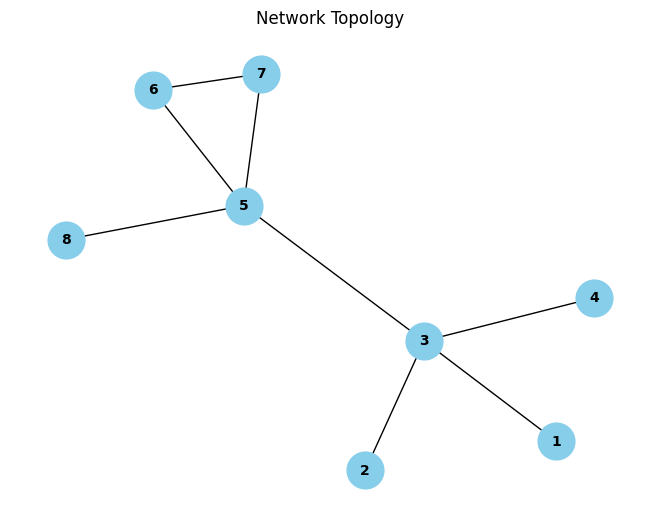

In [2]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Add edges
edges = [(1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7), (5, 8), (6, 7)]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Show the graph
plt.title("Network Topology")
plt.show()

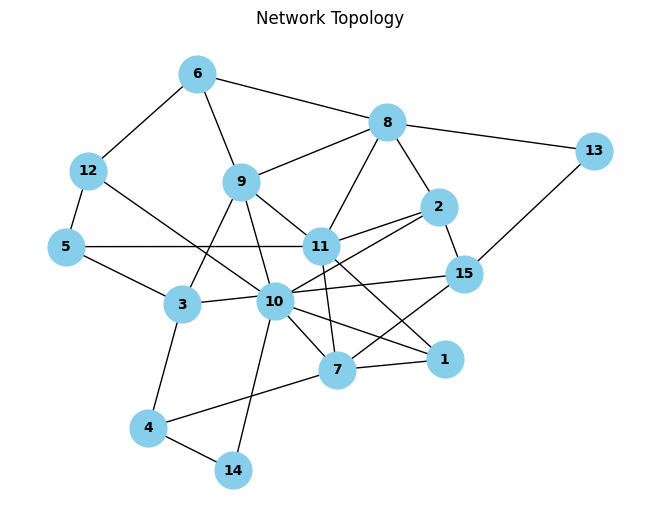

In [3]:
import random

def generate_network_topology(num_nodes):
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(1, num_nodes + 1))

    # Create connections based on the specified topology
    for i in range(1, num_nodes + 1):
        connected_to = random.sample(range(1, num_nodes + 1), random.randint(1, min(4, num_nodes)))
        if i in connected_to:
            connected_to.remove(i)  # Remove self-connections if present
        for node in connected_to:
            G.add_edge(i, node)

    return G

# Generate a network with 8 nodes
num_nodes = 15
random_network = generate_network_topology(num_nodes)

# Draw the graph
pos = nx.spring_layout(random_network)  # positions for all nodes
nx.draw(random_network, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Show the graph
plt.title("Network Topology")
plt.show()

In [4]:
# Calculate betweenness centrality
epsilon = 1e-4
betweenness_centrality = nx.betweenness_centrality(G)

# add an epsilon for each betweenness centrality in order to not have sampling probability = 0
for node in G.nodes():
    betweenness_centrality[node] += epsilon

# Print betweenness centrality for each node
print("Node\tBetweenness Centrality")
for node, centrality in betweenness_centrality.items():
    print(f"{node}\t{centrality:.4f}")

important_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0]
nds = []
centr = []
for n, c in betweenness_centrality.items():
    nds.append(n)
    centr.append(c)


Node	Betweenness Centrality
1	0.0001
2	0.0001
3	0.7144
4	0.0001
5	0.6668
6	0.0001
7	0.0001
8	0.0001


In [5]:
# Normalize betweenness centrality to get probabilities
total_centrality = sum(betweenness_centrality.values())
sampling_probabilities = {node: centrality / total_centrality for node, centrality in betweenness_centrality.items()}

# Print sampling probabilities of each node
for node, probability in sampling_probabilities.items():
    print(f"Node {node}: Sampling Probability = {probability}")

Node 1: Sampling Probability = 7.237186733202836e-05
Node 2: Sampling Probability = 7.237186733202836e-05
Node 3: Sampling Probability = 0.5170142813818202
Node 4: Sampling Probability = 7.237186733202836e-05
Node 5: Sampling Probability = 0.48255148741418763
Node 6: Sampling Probability = 7.237186733202836e-05
Node 7: Sampling Probability = 7.237186733202836e-05
Node 8: Sampling Probability = 7.237186733202836e-05


if they have at least one common neighbor they have to be connected in the auxiliary graph (based on the adjacency matrix), thus in the greedy algorithm they won't be in the same sets


Auxiliary graph:

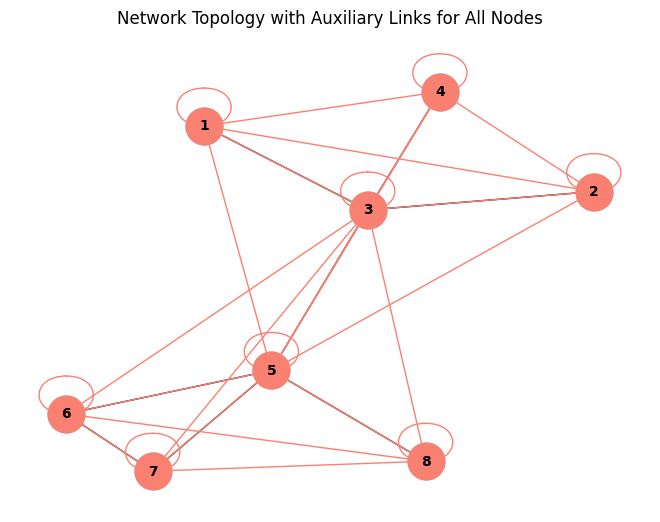

In [7]:
# Create a new graph for modification
H = nx.Graph(G)

# Iterate through each node
for node in G.nodes():
    # Find the neighbors of the current node
    neighbors_of_node = list(G.neighbors(node))
    # Find the common neighbors between the current node and its neighbors
    common_neighbors = set()
    for neighbor in neighbors_of_node:
        common_neighbors.update(set(G.neighbors(neighbor)))
    # Create a subgraph containing the current node, its neighbors, and the common neighbors
    subgraph_nodes = [node] + neighbors_of_node + list(common_neighbors)
    subgraph = G.subgraph(subgraph_nodes)
    # Add edges between the current node and its common neighbors
    for common_neighbor in common_neighbors:
        H.add_edge(node, common_neighbor)

# Draw the original graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Draw the modified graph
nx.draw_networkx_nodes(H, pos, node_size=700, node_color="salmon")
nx.draw_networkx_edges(H, pos, edge_color="salmon")

# Show the graph
plt.title("Network Topology with Auxiliary Links for All Nodes")
plt.show()

Apply greedy coloring algorithm:

Subset 0: [3]
Subset 1: [5]
Subset 2: [1, 6]
Subset 3: [2, 7]
Subset 4: [4, 8]


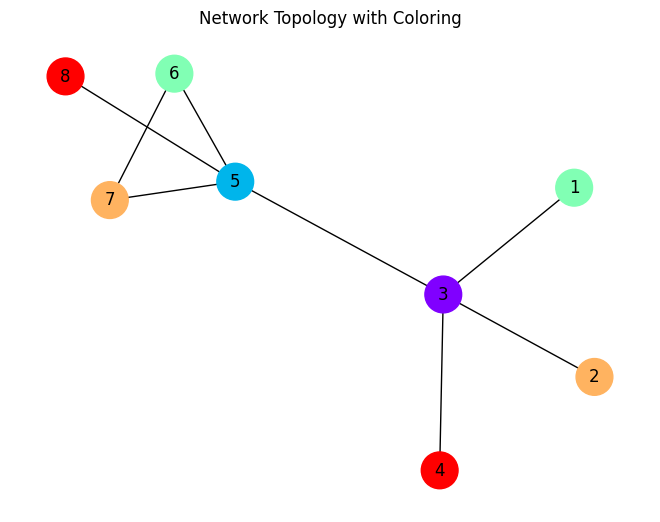

In [8]:
# Create a new graph for modification
H = nx.Graph(G)

# Iterate through each node
for node in G.nodes():
    # Find the neighbors of the current node
    neighbors_of_node = list(G.neighbors(node))
    # Find the common neighbors between the current node and its neighbors
    common_neighbors = set()
    for neighbor in neighbors_of_node:
        common_neighbors.update(set(G.neighbors(neighbor)))
    # Create a subgraph containing the current node, its neighbors, and the common neighbors
    subgraph_nodes = [node] + neighbors_of_node + list(common_neighbors)
    subgraph = G.subgraph(subgraph_nodes)
    # Add edges between the current node and its common neighbors
    for common_neighbor in common_neighbors:
        H.add_edge(node, common_neighbor)

# Apply greedy coloring algorithm
colors = nx.greedy_color(H)

# Assign colors to nodes
for node, color in colors.items():
    G.nodes[node]['color'] = color

# Determine collision-free subsets
collision_free_subsets = {color: [] for color in set(colors.values())}
for node, color in colors.items():
    collision_free_subsets[color].append(node)

# Print collision-free subsets
for color, nodes in collision_free_subsets.items():
    print(f"Subset {color}: {nodes}")

# Draw the graph with node colors
pos = nx.spring_layout(G)
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.rainbow)
plt.title("Network Topology with Coloring")
plt.show()